In [1]:
import math
import random
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import make_classification

## Part 1 - Linear Regression

### Problem 1 - Linear Regression with Direct Minimization

In [2]:
print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [3]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 
    

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    XTrans = np.transpose(X)
    w = np.matmul((np.linalg.inv(np.matmul(XTrans, X))), np.matmul(XTrans, y))
    return w

In [4]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # rmse = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINEN = Xtest.shape[0]
    
    N = Xtest.shape[0]
    
    sumUp = 0
    
    for i in range(0,N):
        eq = ytest[i] - np.dot(np.transpose(w), Xtest[i])
        sumUp += eq * eq
        
    rmse = math.sqrt(sumUp / N)
    #print(str(rmse))
    
    
    #rmse = 0
    return rmse

In [5]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)

rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)


RMSE without intercept on train data - 138.20
RMSE with intercept on train data - 46.77
RMSE without intercept on test data - 326.76
RMSE with intercept on test data - 60.89


PART 1 REPORT:
RMSE without intercept on train data - 138.20
RMSE without intercept on test data - 326.76
RMSE with intercept on train data - 46.77
RMSE with intercept on test data - 60.89
As you can see, it is better to use an intercept, as the resulting RMSE (error) is much lower.

In [6]:
# Problem 2 - Linear Regression with Gradient Descent

In [7]:
print('PROBLEM 2')
print('----------')

PROBLEM 2
----------


In [8]:
def regressionObjVal(w, X, y):

    # compute squared error (scalar) with respect
    # to w (vector) for the given data X and y      
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar value 
    
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    
    #w = np.transpose(w)
    #X = np.transpose(X)

    w = w[:,np.newaxis] # think of this as adding a dummy column into the vector
    
    first = np.dot(X,w)
    #print('first ',first.shape)
    second = y - first
    #print('second ',second.shape)
    third =  np.matmul(np.transpose(second),second) 
    
    #fourth = np.sum(third)
    #print('fourth ',fourth.shape)

    fifth = .5 * third[0][0] 
    #print('error = ',fifth)
    
    error = fifth
    #print('third ',third[0][0])

    #error = 0
    
    return error

In [9]:
def regressionGradient(w, X, y):

    # compute gradient of squared error (scalar) with respect
    # to w (vector) for the given data X and y   
    
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # gradient = d length vector (not a d x 1 matrix)

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE 
    w = w[:,np.newaxis] # think of this as adding a dummy column into the vector
    
    #print("w: "+str(w.shape)+"\nX: "+str(X.shape)+"\ny: "+str(y.shape))
    
    first = np.dot(X,w)
    #print("Xw: " +str(first.shape))
    
    second = np.matmul(np.transpose(X), first)
    third = np.matmul(np.transpose(X), y)
    
    #print("XTXw: "+str(second.shape))
    #print("XTy: "+str(third.shape))

    result = second - third
    #print('part2 res ', result.shape)
    #result = np.sum(result, axis=0)
    #result = result[:,np.newaxis]
    #print('part2 res ', result.shape)

    
    error_grad = result.flatten()
    #print('error_grad = ', error_grad)
    #print('error_grad shape = ', error_grad.shape)

    
    return error_grad

In [10]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
#print(str(w_init.shape))
#print(str(w))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse)

Gradient Descent Linear Regression RMSE on train data - 47.87
Gradient Descent Linear Regression RMSE on test data - 55.35


## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [11]:
print('PROBLEM 3')
print('----------')

PROBLEM 3
----------


In [12]:
def predictLinearModel(w,Xtest):
        # Inputs:\n",
        # w = d x 1\n",
        # Xtest = N x d\n",
        # Output:\n",
        # ypred = N x 1 vector of predictions\n",
    
        # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE\n",
        # ypred = np.zeros([Xtest.shape[0],1])\n",
        index = 0
        ypred = np.matmul(Xtest,w)
#         print("ypred: ",ypred)
        while index < len(ypred):
            if (ypred[index] < 0):
                ypred[index] = -1
            if (ypred[index]>=0):
                ypred[index] = 1
            index += 1
        return ypred

In [13]:
def evaluateLinearModel(w,Xtest,ytest):
        # Inputs:\n",
        # w = d x 1\n",
        # Xtest = N x d\n",
        # ytest = N x 1\n",
        # Output:\n",
        # acc = scalar values\n",
    
        # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE\n",
        acc = 0
        ypred = predictLinearModel(w,Xtest)
#         global count
#         global correct
        count = 0
        correct = 0
        for yp, y in zip(ypred,ytest):
            if yp == y:
                correct = correct+1
            count+=1
        # print(correct)
        # print(count)
        acc = correct/count
        return acc

In [14]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
print(soln)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

     fun: 25.608973399473562
     jac: array([9.59232693e-14, 3.01980663e-13, 5.96855898e-13])
 message: 'Optimization terminated successfully.'
    nfev: 7
     nit: 3
    njev: 7
  status: 0
 success: True
       x: array([-0.0881355 ,  0.28506787, -0.44939862])
Perceptron Accuracy on train data - 0.84
Perceptron Accuracy on test data - 0.84


### Problem 4 - Logistic Regression Using Newton's Method

In [15]:
print('PROBLEM 4')
print('----------')

PROBLEM 4
----------


In [60]:
def logisticObjVal(w, X, y):

    # compute log-loss error (scalar) with respect
    # to w (vector) for the given data X and y                               
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar
    
    #final val
    error = 0
    
    #loop
    for i in range(0,np.size(X,0)):
    
        #inner
        inner = math.log(1 + math.exp(y[i][0] * np.dot(np.transpose(w).flatten(),X[i])))
        #print('inner -', inner)
        
        #add inner
        error = error + inner
    
    error = error / np.size(X,0)
    #print('error',error)

    return error

In [69]:
def logisticGradient(w, X, y):

    # compute the gradient of the log-loss error (vector) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = d length gradient vector (not a d x 1 matrix)

    #fix here
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
        
    #final answer
    gradient = np.zeros((w.shape[0],))
    temp = np.zeros((w.shape[0],))
   
    #test
    
    
    #go through rows
    for i in range(np.size(X,0)):
        
        #inner
        inner = y[i] / (1 + math.exp(y[i][0] * np.dot(np.transpose(w).flatten(),X[i])))
        inner = inner * X[i]
        inner = -1 * (inner / np.size(X,0))
                
        inner_array = np.array(inner)
        temp[0] += inner[0]
        temp[1] += inner[1]
        temp[2] += inner[2]
    
    gradient = temp.flatten()
        
    return gradient


In [75]:
def logisticHessian(w, X, y):

    # compute the Hessian of the log-loss error (matrix) with respect
    # to w (vector) for the given data X and y                               
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # Hessian = d x d matrix
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
        
    #final answer
    hessian = np.eye(X.shape[1])
    
    #go through rows
    for i in range(np.size(X,0)):
        
        #inner
        inner = y[i] / (1 + math.exp(y[i][0] * np.dot(np.transpose(w).flatten(),X[i])))
        inner = inner * np.matmul(X[i],np.transpose(X[i]))
        inner = (inner / np.size(X,0))
        
        
    #print(inner)
    #size checks
    #print(X.shape)
    #print(w.shape)
        
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    
    return hessian

In [76]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
print(soln)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)

     fun: 0.6931471805599458
     jac: array([-0.04      , -0.09373781,  0.49113201])
 message: 'Warning: Desired error not necessarily achieved due to precision loss.'
    nfev: 22
    nhev: 1
     nit: 0
    njev: 10
  status: 2
 success: False
       x: array([0., 0., 0.])
Logistic Regression Accuracy on train data - 0.54
Logistic Regression Accuracy on test data - 0.45


### Problem 5 - Support Vector Machines Using Gradient Descent

In [20]:
print('PROBLEM 5')
print('----------')

PROBLEM 5
----------


In [21]:
def trainSGDSVM(X,y,T,eta=0.01):
    # learn a linear SVM by implementing the SGD algorithm
    #
    # Inputs:
    # X = N x d
    # y = N x 1
    # T = number of iterations
    # eta = learning rate
    # Output:
    # weight vector, w = d x 1
    
    # IMPLEMENT THIS METHOD
    w = np.zeros([X.shape[1],1])

#     print("X: ",X.shape)
#     print("y: ",y.shape)
#     print("w: ",w.shape)
    
    for t in range(1,T+1):
        i = random.randint(0,X.shape[0] - 1)
        
#         print("yi: ",y[i].shape,", ",y[i][0])
#         print("wT: ",(np.transpose(w).flatten()).shape,", ",np.transpose(w).flatten())
#         print("xi: ",X[i].shape,", ",X[i])
  
#         print("w: ",w)
        
        check = y[i][0] * np.dot(np.transpose(w).flatten(),X[i])
#         print("w: ",w.shape)
#         print("check: ", check)
        if(check < 1):
            additive = (eta * y[i][0]) * X[i]
            additive = additive[:,np.newaxis]
            w = w + additive
    return w

In [22]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,100,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

print("\n--------\nPART 5 REPORT:")
args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

SVM Accuracy on train data - 0.84
SVM Accuracy on test data - 0.87

--------
PART 5 REPORT:
SVM Accuracy on train data - 0.85
SVM Accuracy on test data - 0.87


When calling the 'trainSGDSVM' method for 200 iterations with learning parameter set to 0.01, the SVM Accuracy was as follows:
SVM Accuracy on train data - 0.85
SVM Accuracy on test data - 0.87

### Problem 6 - Plotting decision boundaries

In [23]:
print('Problem 6')
print('---------')

Problem 6
---------


In [24]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

[[ 0.05      ]
 [ 0.39338586]
 [-0.78307028]]
[[ 0.04      ]
 [ 0.23359074]
 [-0.60619968]]


Text(0.5, 1.0, 'SVM')

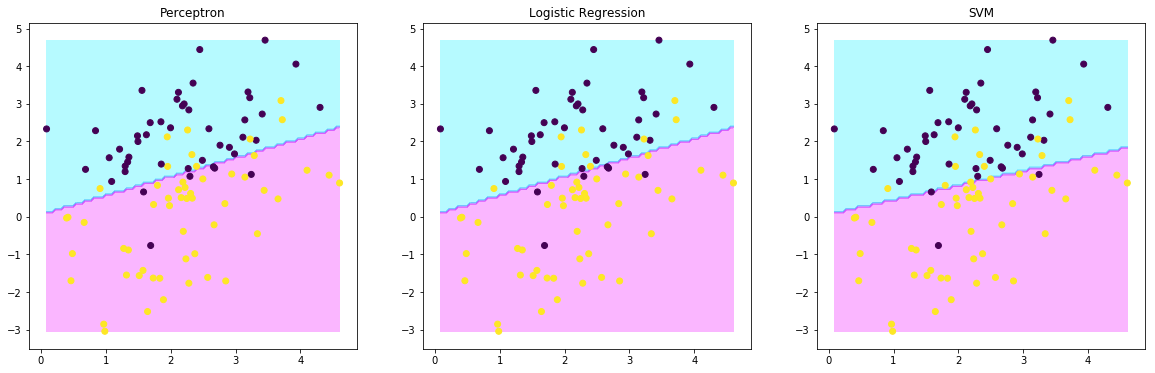

In [25]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

# Replace next three lines with code for learning w using the three methods

#Prob 3
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w_perceptron = np.transpose(np.array(soln.x))
w_perceptron = np.reshape(w,[len(w),1])
print(w_perceptron)

#Prob 4
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w_logistic = np.transpose(np.array(soln.x))
w_logistic = np.reshape(w,[len(w),1])

#Prob 5
w_svm = trainSGDSVM(Xtrain_i,ytrain,100,0.01)
print(w_svm)

fig = plt.figure(figsize=(20,6))

ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtrain_i,ytrain)
ax.set_title('Perceptron')

ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtrain_i,ytrain)
ax.set_title('Logistic Regression')

ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtrain_i,ytrain)
ax.set_title('SVM')